# 1. (2 pts) Dimension reduction using principal component analysis (PCA)

 If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized easily.


## 1.1(1pt) Using Singular-Value Decomposition (SVD) method, please decompose 1st and 2nd principal components and project them to the data.

- Please draw 2D plot using the 1st and 2nd principal components.
- Please legend different colors for the 10 labels in the graph.

In [24]:
import pandas as pd

"""
Reading Data
"""

df = pd.read_csv('fashion_mnist1.csv')
X = df.iloc[:, 1:].values / 255.0
y = df.iloc[:, 0].values
print(f"{X.shape = }, {y.shape = }")

X.shape = (10000, 784), y.shape = (10000,)


In [25]:
import numpy as np
import warnings

""" Global Constants for the consistency """
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']
np.random.seed(2024)
warnings.filterwarnings("ignore")


In [26]:
import numpy as np
import matplotlib.pyplot as plt

class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = []
        
    def mean_centric(self, X):
        self.mean = np.mean(X.T, axis=1)
        return X - self.mean
    
    def _covariance(self, X):
        """ Compute the covarriance of the given data."""
        return np.cov(X.T)
    
    def _eigen_values_and_eigenvectors(self, X):
        """ Compute the eigen value and eigen vectors """
        eigen_values, eigen_vectors = np.linalg.eig(X)
        print("eigen_values = \n", eigen_values)
        print("eigen_vectors = \n", eigen_vectors)
        return eigen_values, eigen_vectors
    
    def _sort_eigen_values(self, eigen_values, eigen_vectors):
        """ Sort the eigen values to priortize the features which capture the most variance. """
        sorted_indices = np.argsort(eigen_values)[::-1]
        print(f"{sorted_indices = }")
        sorted_eigen_values = eigen_values[sorted_indices]
        sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
        return sorted_eigen_values, sorted_eigen_vectors
    
    def fit(self, X):
        X_mean_centric = self.mean_centric(X)
        print("after scaling X = \n", X_mean_centric)
        cov = self._covariance(X_mean_centric)
        print("covariance matrix = \n", cov)
        eigen_values, eigen_vectors = self._eigen_values_and_eigenvectors(cov)
        eigen_values, eigen_vectors = self._sort_eigen_values(eigen_values, eigen_vectors)
        selected_eigen_vectors = eigen_vectors[:, :self.n_components]
        self.components = selected_eigen_vectors
        project_data = self.transform(X)
        return project_data
    
    def fit_svd(self, X):
        """ Use the SVD method to compute the top n components."""
        X_mean_centric = self.mean_centric(X)
        U, S, Vt = np.linalg.svd(X_mean_centric, full_matrices=False)
        self.components = Vt.T[:, :self.n_components]
        pca_svd = X_mean_centric @ self.components
        return pca_svd
    
    def transform(self, X):
        """ Transform the given data using the principal components """
        return np.dot(X, self.components)
        
    def inverse_transform(self, X):
        """ Regenerate the image using principal components and add the mean, as the data was made mean centered"""
        return np.dot(X, self.components.T) + self.mean
    
    def plot(self, X):
        plt.figure(figsize=(6,5), dpi=150)
        for i in range(10):
            idx = y == i
            plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)
        
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Labels')
        plt.title('Fashion-MNIST Data : 2 Principal Components')
        plt.grid(True)
        plt.show()
        


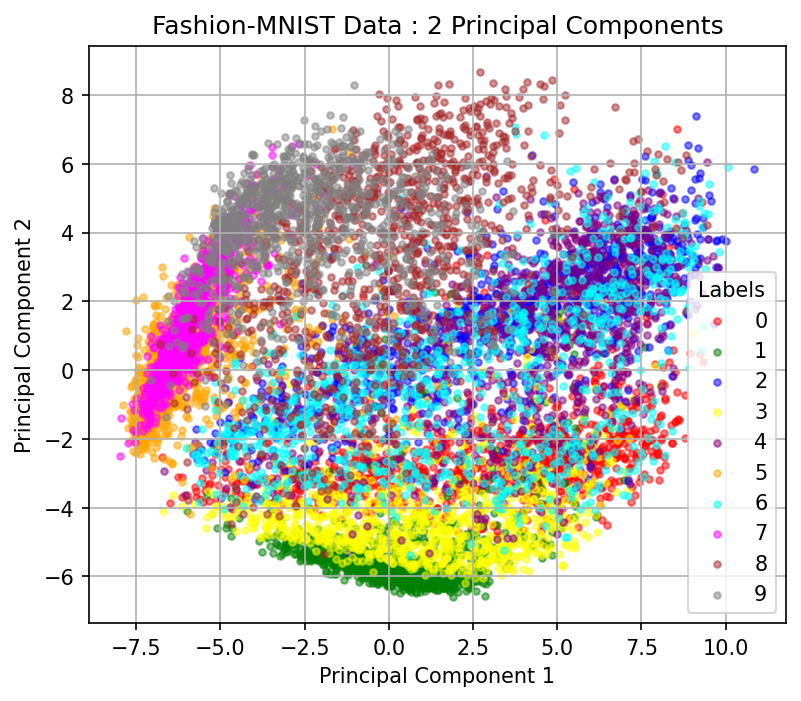

In [27]:
my_pca = MyPCA(n_components=2)
my_pca_res = my_pca.fit_svd(X)
my_pca.plot(my_pca_res)


## Observations - 

- The plot shows the 2D projection of the Fashion-MNIST dataset using the first two principal components obtained from PCA.
- Each point in the plot represents an image from the dataset, with different colors indicating different labels (classes).
- The plot demonstrates the ability of PCA to reduce the dimensionality of the data while preserving the underlying structure and patterns.
- By projecting the data onto the principal components, we can visualize the high-dimensional data in a lower-dimensional space.
- The plot provides insights into the distribution of the data and the relationships between different classes.
- But as we can also see that its fail to capture the variance of the data.
- The clusters are overlapping, and the separation between classes is not clear.
- This is due to the limitations of PCA, which is a linear dimensionality reduction technique.
- In cases where the data is not linearly separable, more advanced techniques such as t-SNE may be more suitable for visualization.


## 1.2(1pt) As we discussed during the class, we can compress images using PCA. 

- Please select 10 images. The selected images should have different labels. Please compress the images using k=2, 5, 10. Then, visualize the original images and the compressed images with different k.

In [28]:
different_k = [2, 5, 10]

In [29]:
def train_pca_for_different_k(X_train, n_components):
    pca = MyPCA(n_components=n_components)
    pca.fit_svd(X_train)
    return pca

pcas = {}
for k in different_k:
    pcas[k] = train_pca_for_different_k(X, k)


In [30]:
images, labels = X, y
X_sample, y_sample = [], []

for label in np.unique(y):
    idx = np.where(y == label)[0]
    X_sample.append(images[idx[0]]) # X_sample.append(random.choice(images))
    y_sample.append(label)

X_sample = np.array(X_sample)
print(f"{X_sample.shape = }, {len(y_sample) = }")

X_sample.shape = (10, 784), len(y_sample) = 10


In [31]:
def apply_pca_and_reconstruct(images_to_reconstruct, k):
    """
    returns: sample reconstructed images.
    """
    pca = pcas[k]
    images_pca = pca.transform(images_to_reconstruct)  
    print(f"compressed Images - {images_pca.shape = }")
    images_reconstructed = pca.inverse_transform(images_pca) 
    return images_reconstructed


reconstructed_images = {}
for k in [2, 5, 10]:
    reconstructed_images[k] = apply_pca_and_reconstruct(X_sample, k)
    print(f"Reconstructed images with k={k} shape: {reconstructed_images[k].shape}")


compressed Images - images_pca.shape = (10, 2)
Reconstructed images with k=2 shape: (10, 784)
compressed Images - images_pca.shape = (10, 5)
Reconstructed images with k=5 shape: (10, 784)
compressed Images - images_pca.shape = (10, 10)
Reconstructed images with k=10 shape: (10, 784)


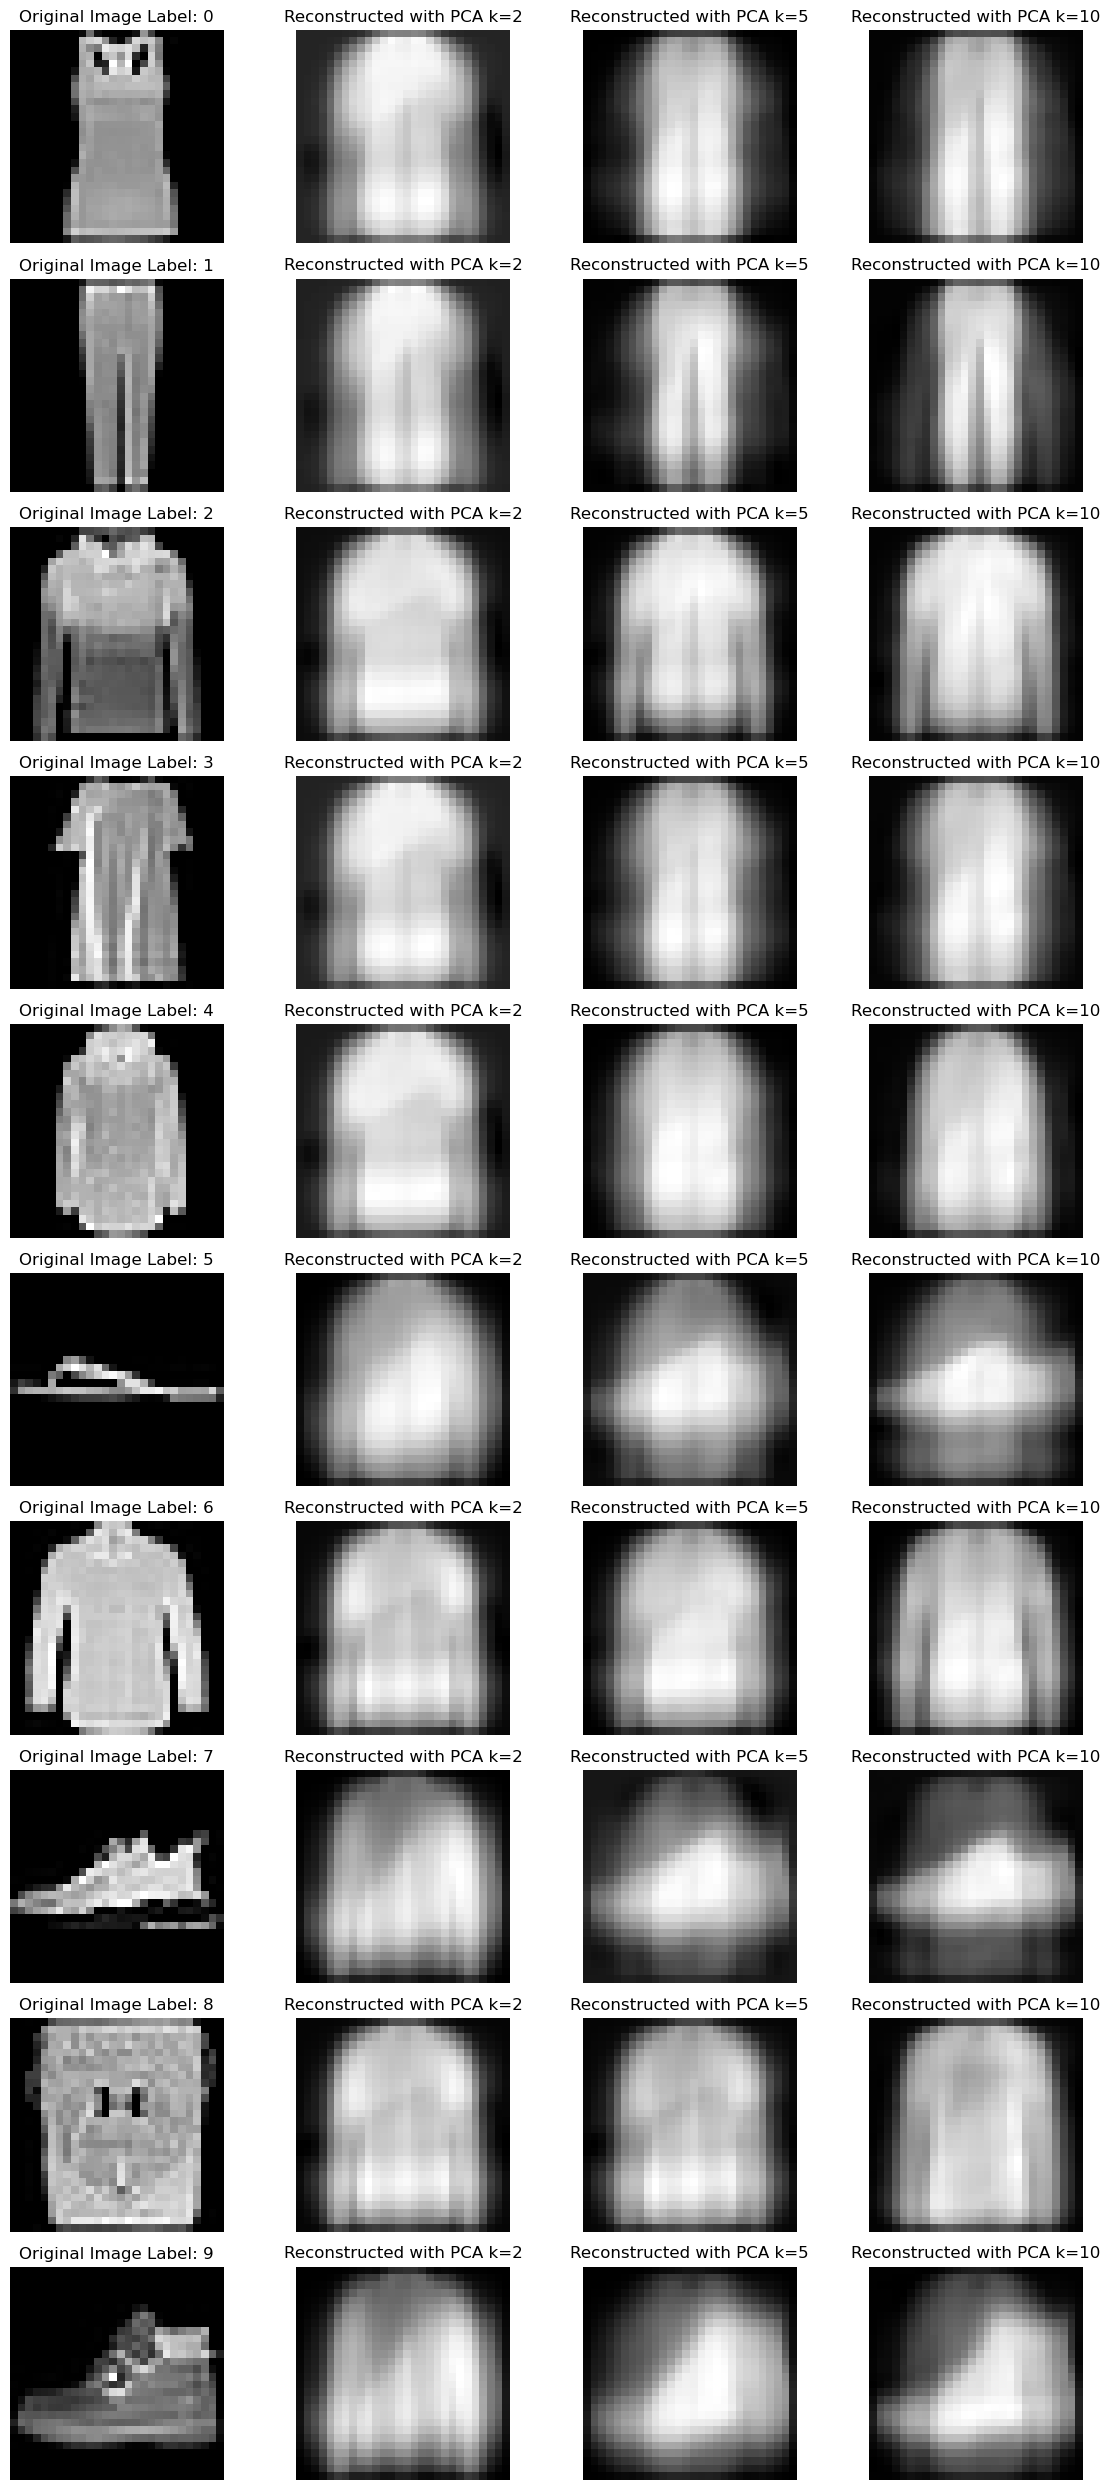

In [32]:
def plot_images(original, labels, reconstructed_images):
    n = len(original)
    fig, axes = plt.subplots(nrows=n, ncols=4, figsize=(12, 2.5 * n))
    
    for i in range(n):
        ax = axes[i, 0]
        ax.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Original Image Label: {labels[i]}")
        ax.axis('off')

        ax = axes[i, 1]
        ax.imshow(reconstructed_images[2][i].reshape(28, 28), cmap='gray')
        ax.set_title("Reconstructed with PCA k=2")
        ax.axis('off')

        ax = axes[i, 2]
        ax.imshow(reconstructed_images[5][i].reshape(28, 28), cmap='gray')
        ax.set_title("Reconstructed with PCA k=5")
        ax.axis('off')

        ax = axes[i, 3]
        ax.imshow(reconstructed_images[10][i].reshape(28, 28), cmap='gray')
        ax.set_title("Reconstructed with PCA k=10")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


plot_images(X_sample, y_sample, reconstructed_images)


### Observations

- As we increase the number of principal components (k), the reconstructed images contains more and more information.
- When k=2, the reconstructed images are quite blurry and do not capture the details of the original images and tends to follow a general pattern.
- As we increase k to 5 and 10, the reconstructed images become clearer and more similar to the original images, but we can also see the kind of most prominent features even with differnt shapes.
- This demonstrates that PCA can be used to compress images by reducing the dimensionality of the data while retaining the most important information.
- The choice of k determines the trade-off between image quality and compression level.
- In practice, the optimal value of k can be determined using techniques such as cross-validation or by analyzing the explained variance ratio.
- PCA is a powerful technique for dimensionality reduction and feature extraction, with applications in image processing, data visualization, and machine learning.
- By capturing the most important patterns in the data, PCA can help simplify complex datasets and improve the performance of machine learning algorithms.
- The ability to visualize high-dimensional data in a lower-dimensional space can provide valuable insights and facilitate data analysis and interpretation.
- Overall, PCA is a versatile and widely used technique that can be applied to a wide range of problems in data science and machine learning. 


# --------------------------------------------------------

# 2. (5 pts) Dimension Reduction Using t-SNE

## 2.1 (2 pts) Please build the t-SNE algorithm from scratch based on the equations below:

Please cite if you are referring to any source for the algorithms.
There are many hyperparameters to optimize, such as initialization (random seed), learning rate 𝜆 , momentum
𝛼(𝑡), iteration number, and perplexity.



$$
P_{j|i} = \frac{\exp\left(- \frac{\|x_i - x_j\|^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(- \frac{\|x_i - x_k\|^2}{2\sigma_i^2}\right)}
$$

$$
q_{j|i} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

$$
C = KL(P||Q) = \sum_i \sum_j P_{j|i} \log \frac{P_{j|i}}{q_{j|i}}
$$

$$
\frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)(1 + \|y_i - y_j\|^2)^{-1}
$$

$$
y^{(t)} = y^{(t-1)} + \lambda \frac{\partial C}{\partial y} + \alpha(t)(y^{(t-1)} - y^{(t-2)})
$$

In [34]:
"""
Reading data and normalize it
"""

import pandas as pd

df = pd.read_csv('fashion_mnist1.csv')
X = df.iloc[:, 1:].values / 255.0
y = df.iloc[:, 0].values
print(f"{X.shape = }, {y.shape = }")

X.shape = (10000, 784), y.shape = (10000,)


In [35]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']


In [22]:
import os
import sys
from tqdm import tqdm

import matplotlib.pyplot as plt

class MyTSNE:
    
    def __init__(self, perplexity=10, iterations=1000, n_components=2, learning_rate=100, 
                 early_exaggeration=4, momentum=0.5, initialization_method ='random', 
                 random_state=2024, verbose=True):
        """
        t-SNE algorithm parameters
            :param perplexity: Perplexity
            :param iterations: number of Iterations the gradient descent algorithm will run
            :param n_components: Number of components
            :param learning_rate: Learning Rate
            :param early_exaggeration: this parameter is used to give weight for the cluster identification
            :param momentum: momentum
            :param initialization_method: Initialization method for the t-SNE
            :param random_state: Random State
        """
        self.perplexity = perplexity
        self.iterations = iterations
        self.n_components = n_components
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.initialization_method = initialization_method
        self.random_state = random_state
        self.verbose = verbose
        self.early_exaggeration = early_exaggeration
        self.costs = []
        
    def _params(self):
        parameters = {
            'perplexity': self.perplexity,
            'iters': self.iterations,
            'lrn_rate': self.learning_rate,
            'early_ex': self.early_exaggeration,
            'init_method': self.initialization_method,
        }
        return ",".join(f"{k}={v}" for k, v in parameters.items())
            
    def _find_sigma(self, norm, i, perplexity):
        """
        This function will help ti find the best sigma value for the given point. 
        Looks for the refernce for this function, there were various approaches dicuseed using the
        binary search and all, but I impletmented this function.
            :param norm: pairwise squared differences between data points
            :param i: Iteration number
            :param perplexity: desired Perplexity
        
        return: sigma that satisfies the perplexity condition.
        """
        result = np.inf  
        std_norm = np.std(norm)  
        sigma = 0
        
        for sigma_i in np.linspace(0.01 * std_norm, 5 * std_norm, 200):
            p = np.exp(-(norm**2) / (2 * sigma_i**2))
            p[i] = 0
            p_new = np.maximum(p / np.sum(p), sys.float_info.min)
    
            H = -np.sum(p_new * np.log2(p_new))
    
            if np.abs(np.log(perplexity) - H * np.log(2)) < np.abs(result):
                result = np.log(perplexity) - H * np.log(2)
                sigma = sigma_i
    
        return sigma
    
    def get_original_pairwise_affinities(self, X, perplexity):
        """
        This function will get the original pairwise affinites between the points.
            :param X: input data
            :param perplexity: perplexity
    
        :return - original high dimension probability
        """
        path = f"p_ij_n_{X.shape[0]}_perplexity_{perplexity}.npy" 
        if os.path.exists(path):
            return np.load(path)
        n = X.shape[0]
        print(f"Starting the high dimension computation...")
        p_ij = np.zeros(shape=(n, n))
        for i in tqdm(range(0, n), desc=f"Computing P_ij for {n = }, {perplexity = }"):
            diff = X[i] - X
            norm = np.linalg.norm(diff, axis=1)
            sigma_i = self._find_sigma(norm, i, perplexity)  
            p_ij[i, :] = np.exp(-(norm**2) / (2 * sigma_i**2))
            np.fill_diagonal(p_ij, 0)
            p_ij[i, :] = p_ij[i, :] / np.sum(p_ij[i, :])
    
        p_ij = np.maximum(p_ij, sys.float_info.min)
        print("Completed the high dimension computation...")
        np.save(path, p_ij)
        return p_ij

    def get_symmetric_p_ij(self, p_ij):
        """
        Obtain symmetric affinities matrix as p_i|j != p_j|i, so we are making the values symmetric.
            :param - p_ij: The input affinity matrix.
    
        returns: symmetric affinities matrix.
        """
        n = p_ij.shape[0]
        p_ij = (p_ij + p_ij.T) / (2 * n)
        p_ij = np.maximum(p_ij, sys.float_info.min)
        return p_ij
    
    def get_low_dimensional_affinities(self, Y):
        n = Y.shape[0]
        sum_Y = np.sum(np.square(Y), axis=1)
        D = np.add(np.add(-2 * np.dot(Y, Y.T), sum_Y).T, sum_Y)
        D = np.maximum(D, 0)
        num = (1 + D) ** (-1)
        np.fill_diagonal(num, 0)
        q_ij = num / np.sum(num)
        q_ij = np.maximum(q_ij, sys.float_info.min)
        return q_ij, num
    
    def _gradient(self, p_ij, q_ij, num, Y):
        """
        Obtain gradient of cost function at current point Y.
    
            :param p_ij - The joint probability distribution matrix.
            :param q_ij - The Student's t-distribution matrix.
            :param num  - Numerator of q_ij, i.e., (1 + || y_i - y_j ||^2 )^{-1}
            :param Y    - The current point in the low-dimensional space.
    
        :returns - gradient of cost function for a given point
        """
        
        Z = (p_ij - q_ij) * num      
    
        sum_Z = np.sum(Z, axis=1)  
    
        gradient_yi = 4 * (Y * sum_Z[:, np.newaxis] - Z @ Y)
    
        return gradient_yi
 
    def initialization(self, X, initialization_method) :
        """
        Initial t-SNE either randomly or using PCA.
            :param X: input data
            :param initialization_method: initialization method can be random or PCA
        
        :return - initial solution for t-SNE.
        """
        if initialization_method.upper() == "PCA":
            print("Initializing with PCA...")
            X_centered = X - X.mean(axis=0)
            U, S, V = np.linalg.svd(X_centered)
            return X_centered @ V.T[:, :self.n_components]
        else:
            print(f"Initialization method {initialization_method}, is not PCA, so random initialization is used.")
            return np.random.normal(loc=0, scale=1e-4, size=(X.shape[0], self.n_components))
    
    def fit(self, X):
        """
        train t-sne for the input data.
            :param X: Training data
        :return list of low-dimensional embeddings and the history of embeddings at each iteration.
        """
        n = X.shape[0]
    
        # Get original affinities matrix
        p_ij = self.get_original_pairwise_affinities(X, self.perplexity)
        p_ij = self.get_symmetric_p_ij(p_ij)
    
        # Initialization
        Y = np.zeros(shape=(self.iterations+2, n, self.n_components))
        Y[0] = np.zeros(shape=(n, self.n_components))
        Y[1] = np.array(self.initialization(X, self.initialization_method))
        distances = []
    
        print("Optimizing Low Dimensional Embedding....")
        for t in tqdm(range(1, self.iterations + 1)):
                
            alpha, early_exaggeration = (self.momentum, self.early_exaggeration) if t < min(250, self.iterations//2) else (0.8, 1)
    
            # Get Low Dimensional Affinities
            q_ij, num = self.get_low_dimensional_affinities(Y[t])
            gradient = self._gradient(early_exaggeration * p_ij, q_ij, num, Y[t])
            
            Y[t + 1] = Y[t] - self.learning_rate * gradient + alpha * (Y[t] - Y[t - 1])  
    
            cost = np.sum(p_ij * np.log(p_ij / q_ij))
            self.costs.append(cost)    

            if self.verbose and t % 100 == 0 or t == 1:
                print(f"\tIteration {t}: Value of Cost Function is {cost}")
    
        print(f"${self._params()}, Completed Low Dimensional Embedding: Final Cost = {self.costs[-1]}")
        embedding = Y[-1]
        return embedding, Y
    
    def plot_cost(self):
        """
        plot the cost function.
        """
        fig, ax = plt.subplots(figsize=(6,5))
        ax.plot(self.costs)
        ax.set_title(f"t-SNE Cost Function with parameters \n {self._params()}")
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Cost")
        plt.grid(True)
        plt.show()
        
    def plot_embeddings(self, embeddings, labels, centroids=[]):
        """
        plot the tsne plot in the lower space.
        """
        fig, ax = plt.subplots(figsize=(7, 6), dpi=150)
        for j, class_label in enumerate(sorted(np.unique(labels))):
            class_points = embeddings[labels == class_label]
            ax.scatter(class_points[:, 0], class_points[:, 1], color=colors[j], label=f"Class {class_label}", s=10, alpha=0.6)
        
        for j, centroid in enumerate(centroids):
            ax.scatter(centroid[0], centroid[1], color=colors[j], marker='x', s=100)
            ax.text(centroid[0], centroid[1], f'Class {j}', fontsize=6, ha='center', va='center', 
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.6))
        
        ax.set_title(f"t-SNE Plot, with hyper-parameters \n {self._params()}")
        ax.legend(loc='upper right', title="Classes", bbox_to_anchor=(1.2, 1))
        ax.set_xlabel("1st Component")
        ax.set_ylabel("2nd Component")
        ax.grid(True)
        plt.show()



Initializing with PCA...
Optimizing Low Dimensional Embedding....


  0%|▍                                                                                                                                                                                                                   | 1/500 [00:00<03:10,  2.62it/s]

	Iteration 1: Value of Cost Function is 2.473865426337616


 20%|██████████████████████████████████████████                                                                                                                                                                        | 100/500 [00:31<01:59,  3.33it/s]

	Iteration 100: Value of Cost Function is 2.011656649673952


 40%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                              | 200/500 [01:02<01:32,  3.25it/s]

	Iteration 200: Value of Cost Function is 2.093477047097942


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 300/500 [01:33<01:01,  3.25it/s]

	Iteration 300: Value of Cost Function is 1.6265927684837662


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 400/500 [02:05<00:32,  3.06it/s]

	Iteration 400: Value of Cost Function is 1.484997331254645


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:38<00:00,  3.15it/s]

	Iteration 500: Value of Cost Function is 1.410984482946446
$perplexity=30,iters=500,lrn_rate=200,early_ex=4,init_method=PCA, Completed Low Dimensional Embedding: Final Cost = 1.410984482946446


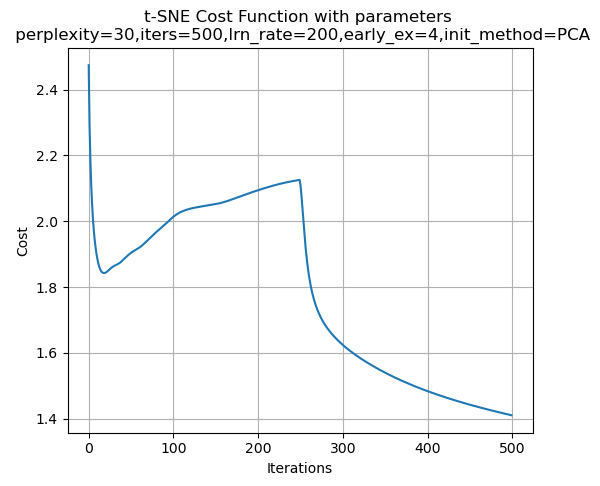

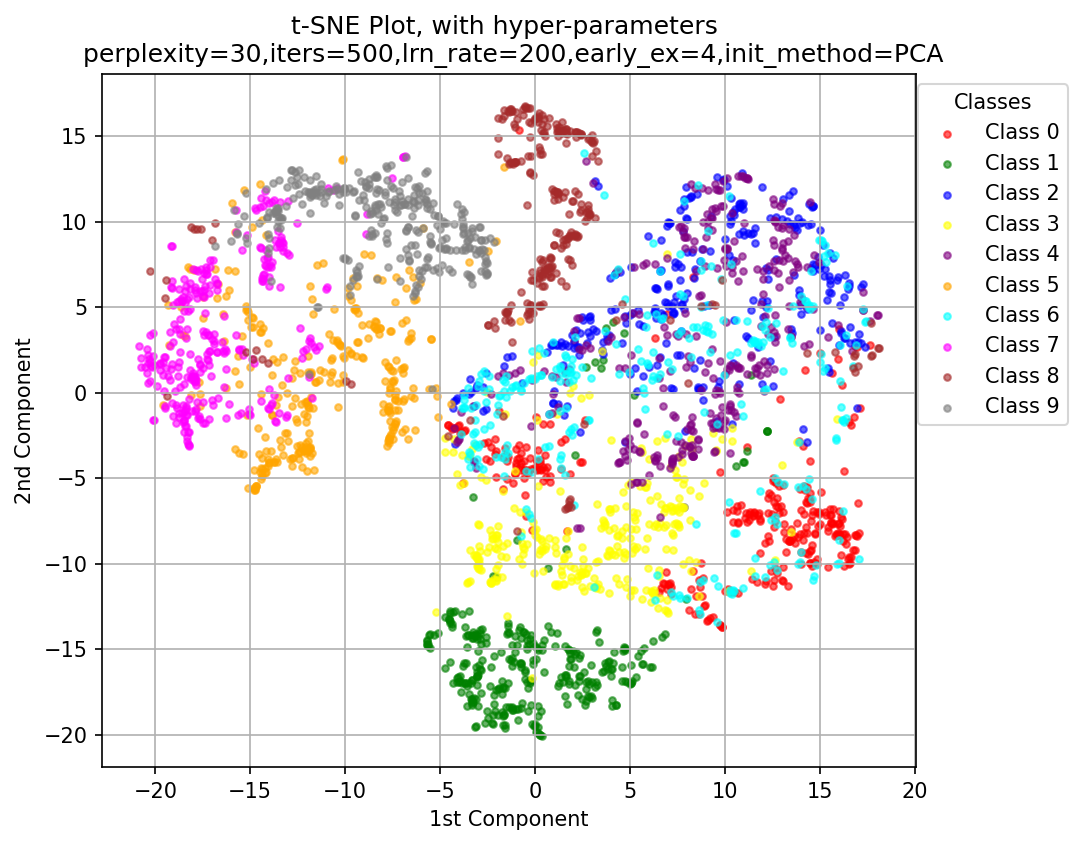

In [13]:
"""
Running algorithm for the sample of data @3000 records.
Just to verify the implementation.
"""

n_sample = 3000
X_sample = X[:n_sample, ]
y_sample = y[:n_sample]
tsne = MyTSNE(perplexity=30, iterations=500, learning_rate=200, n_components=2, 
            early_exaggeration=4, initialization_method='PCA')
embeddings, Y = tsne.fit(X_sample)
tsne.plot_cost()
tsne.plot_embeddings(embeddings, y_sample)


## Observations - 

- Here we can see that, even with small data, the seperation of the data is very good.
- As there is some overlap but that is inherent coming from the data.
- Some classe seperation is very good, like class-0, class-7 and class-8.
- Using PCA we get very less loss value.
- We can see that till iteration 250 the cost is high and even increaing, because this is because of early exgeration as system is trying to bring the smaller clusters of smilar points are bringing together.
- After 250 iterations its make each cluster farther from each other.

# 2.2(1.5pts) Using the t-SNE method, please reduce the 784 dimensions to 2 dimensions. Please try at least 5 different hyperparameters conditions.

- For each hyperparameter condition, please calculate its corresponding D and J.
- Please calculate the sum of the distance D among the 10 centroids. 
- Each centroid corresponds to each label. Since there are 10 centroids, you should calculate distance for 45 pairs. 
- Also, please calculate the objective function J.
- Your goal is to maximize the distance D among the centroids and to minimize the objective function J by optimizing the hyperparameters.

$$
D = \sum_{i,j} \|y_i - y_j\|^2
$$

$$
J = \sum_{i=1}^{k} \sum_{j=1}^{n} \|x_i - c_j\|^2
$$

In [14]:
def compute_centroids(embeddings, y):
    """
    For given embeddings, this function will get the centroids for each class in the output label.
    This centroid will help us to navigate why two classes may be similar to each other.
    """
    centroids = []
    for label in sorted(np.unique(y)):
        indices = np.where(y == label)[0]
        centroid = np.mean(embeddings[indices], axis=0)
        centroids.append(centroid)
    return np.array(centroids)




def compute_centroid_distance(centroids):
    """
    Given the centroids, it will compute distance between all of the centroids
    :param centroids: list of centroids
    :return: sum of all distances
    """
    D = 0.0
    for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
            D += np.sum((centroids[i] - centroids[j]) ** 2)
    return D




def compute_objective_function(embedding, y, centroids):
    """
    Computing the objective function
    """
    J = 0.0
    for idx, label in enumerate(sorted(np.unique(y))):
        indices = np.where(y == label)[0]
        J += np.sum(np.sum((embedding[indices] - centroids[idx]) ** 2, axis=1))
    return J



In [15]:
from joblib import Parallel, delayed


def run_tsne(params, i, X_sample, y_sample):
    print(f"Running Condition {i + 1}: {params}")

    tsne = MyTSNE(perplexity=params['perplexity'], iterations=params['iterations'], learning_rate=params['learning_rate'], 
                momentum=params['momentum'], early_exaggeration=params['early_ex'], initialization_method=params['initialization_method'], verbose=False)
    embeddings, _ = tsne.fit(X_sample)
    centroids = compute_centroids(embeddings, y_sample)
    D = compute_centroid_distance(centroids)
    J = compute_objective_function(embeddings, y_sample, centroids)
    res = {'D': D, 'J': J, 'params': tsne._params(), 'tsne': tsne, "centroids": centroids, "embeddings": embeddings}
    print(f"Condition {i + 1}: D = {D:.4f}, J = {J:.4f}")
    return res


hyper_parameters = [
    {'perplexity': 10, 'learning_rate': 200, 'iterations': 500,  'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'},
    {'perplexity': 10, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'},
    {'perplexity': 30, 'learning_rate': 200, 'iterations': 500,  'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'},
    {'perplexity': 30, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'},
    {'perplexity': 50, 'learning_rate': 200, 'iterations': 500,  'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'},
    {'perplexity': 50, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'},
]

n_sample=3000
X_sample = X[:n_sample, ]
y_sample = y[:n_sample]

# Parallel execution
results = Parallel(n_jobs=2)(delayed(run_tsne)(params, i, X_sample, y_sample) for i, params in enumerate(hyper_parameters))



Running Condition 1: {'perplexity': 10, 'learning_rate': 200, 'iterations': 500, 'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'}
Initialization method random, is not PCA, so random initialization is used.
Optimizing Low Dimensional Embedding....


  0%|          | 0/1000 [00:00<?, ?it/s]96it/s]

Running Condition 2: {'perplexity': 10, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'}
Initializing with PCA...
Optimizing Low Dimensional Embedding....


  0%|          | 0/500 [00:00<?, ?it/s]  3.83it/s]

	Iteration 1: Value of Cost Function is 5.416747390084329
$perplexity=10,iters=500,lrn_rate=200,early_ex=4,init_method=random, Completed Low Dimensional Embedding: Final Cost = 2.0202091049376882
Condition 1: D = 12157.0112, J = 177647.8205
Running Condition 3: {'perplexity': 30, 'learning_rate': 200, 'iterations': 500, 'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'}
Initialization method random, is not PCA, so random initialization is used.
Optimizing Low Dimensional Embedding....


100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


	Iteration 1: Value of Cost Function is 4.370090573876772
$perplexity=30,iters=500,lrn_rate=200,early_ex=4,init_method=random, Completed Low Dimensional Embedding: Final Cost = 1.5085126026197984
Condition 3: D = 9981.0631, J = 98579.3237
Running Condition 5: {'perplexity': 50, 'learning_rate': 200, 'iterations': 500, 'momentum': 0.5, 'early_ex': 4, 'initialization_method': 'random'}
Initialization method random, is not PCA, so random initialization is used.
Optimizing Low Dimensional Embedding....


  0%|          | 0/1000 [00:00<?, ?it/s]81it/s]

	Iteration 1: Value of Cost Function is 3.3846076956696978
$perplexity=10,iters=1000,lrn_rate=500,early_ex=8,init_method=PCA, Completed Low Dimensional Embedding: Final Cost = 1.479534602330832
Condition 2: D = 65743.5357, J = 668556.2195
Running Condition 4: {'perplexity': 30, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'}
Initializing with PCA...
Optimizing Low Dimensional Embedding....


  0%|          | 0/1000 [00:00<?, ?it/s] 3.46it/s]

	Iteration 1: Value of Cost Function is 3.880818047196791
$perplexity=50,iters=500,lrn_rate=200,early_ex=4,init_method=random, Completed Low Dimensional Embedding: Final Cost = 1.2223165179742999
Condition 5: D = 8606.6254, J = 80256.7445
Running Condition 6: {'perplexity': 50, 'learning_rate': 500, 'iterations': 1000, 'momentum': 0.5, 'early_ex': 8, 'initialization_method': 'PCA'}
Initializing with PCA...
Optimizing Low Dimensional Embedding....


100%|██████████| 1000/1000 [04:15<00:00,  3.92it/s]


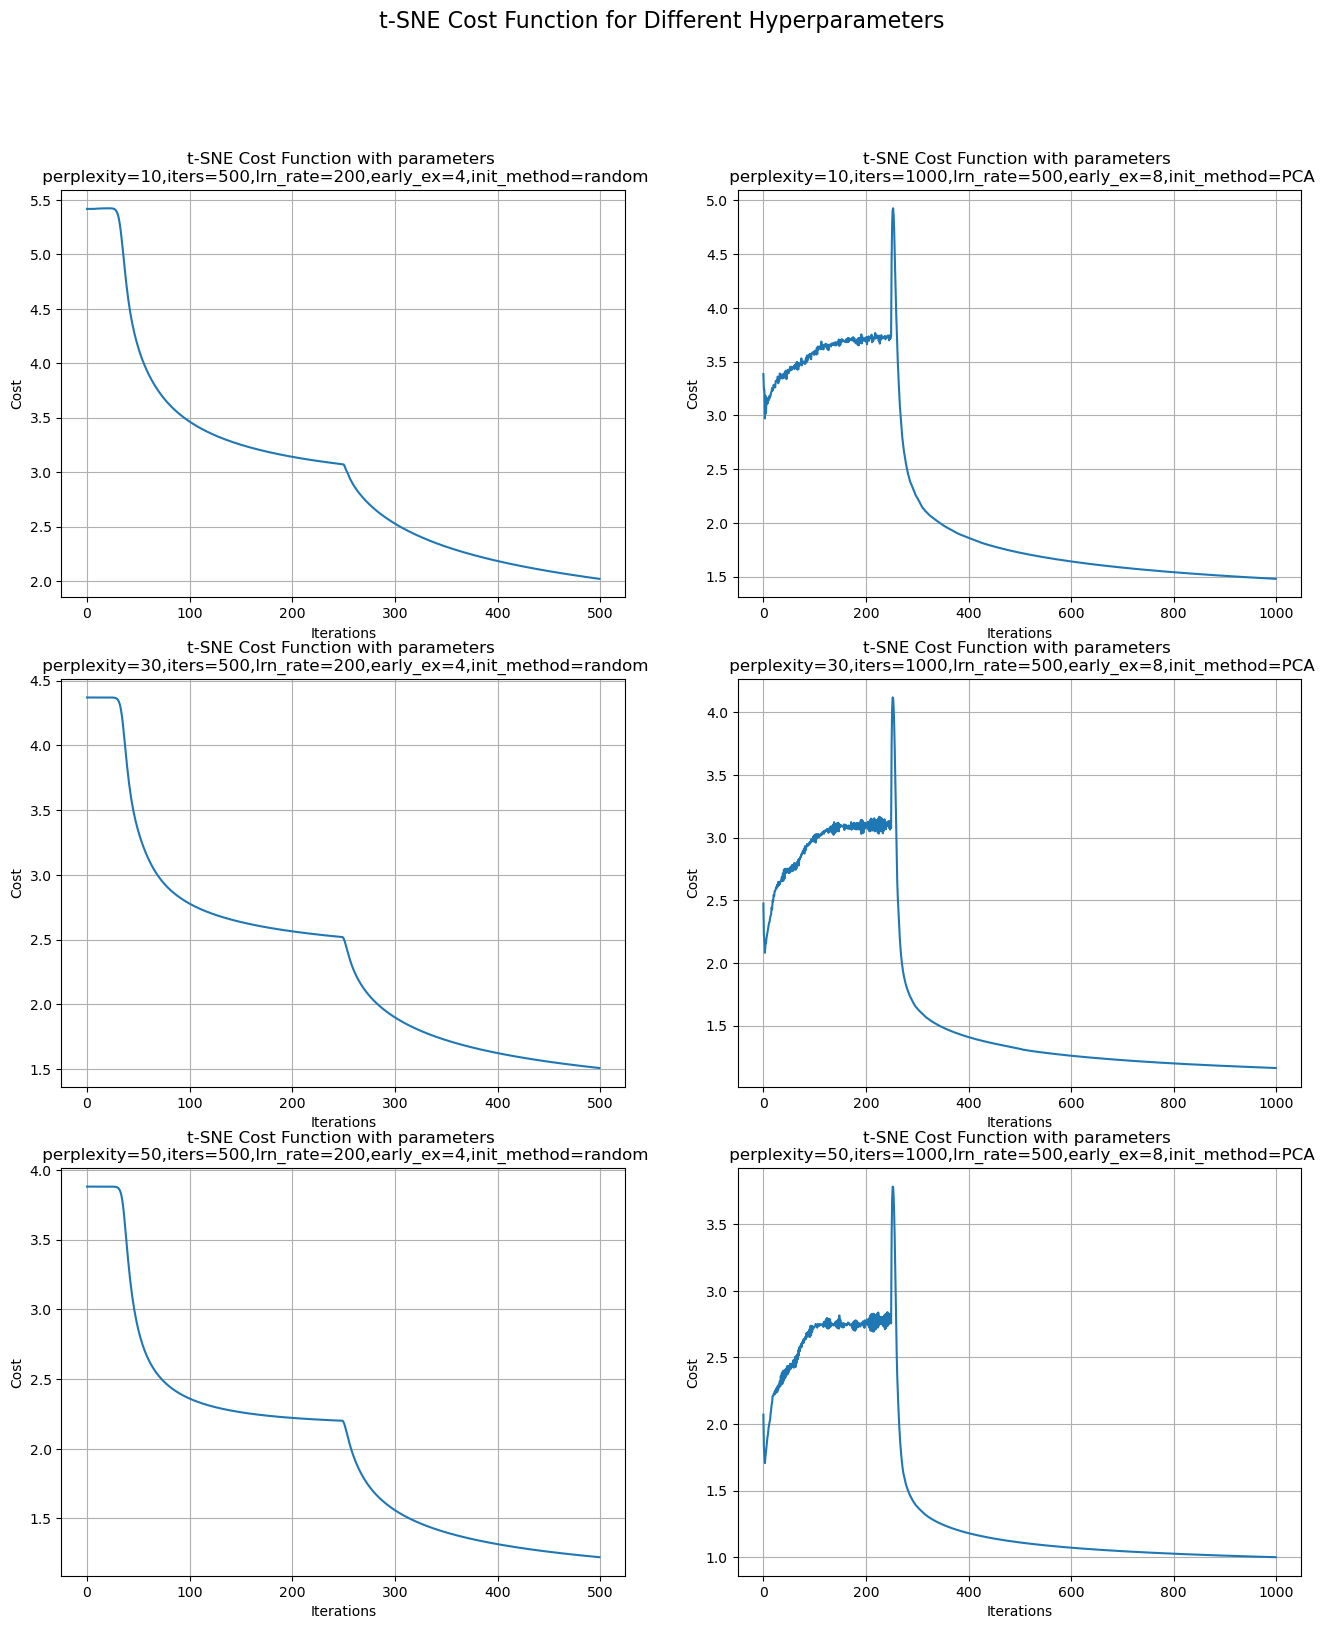

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()
fig.suptitle("t-SNE Cost Function for Different Hyperparameters", fontsize=16)
for i, data in enumerate(results):
    _tsne = results[i]['tsne']
    ax = axes[i]
    ax.plot(_tsne.costs)
    ax.set_title(f"t-SNE Cost Function with parameters \n {_tsne._params()}")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Cost")
    ax.grid(True)
    
plt.show()

In [37]:
pd.set_option('display.max_colwidth', None)

results_df = pd.DataFrame.from_dict(results)
results_df[["params", "D", "J"]].head(10)


,params,D,J
0,"perplexity=10,iters=500,lrn_rate=200,early_ex=4,init_method=random",12157.011237,177647.820532
1,"perplexity=10,iters=1000,lrn_rate=500,early_ex=8,init_method=PCA",65743.535741,668556.219524
2,"perplexity=30,iters=500,lrn_rate=200,early_ex=4,init_method=random",9981.063080,98579.323707
3,"perplexity=30,iters=1000,lrn_rate=500,early_ex=8,init_method=PCA",44254.342696,386034.071803
4,"perplexity=50,iters=500,lrn_rate=200,early_ex=4,init_method=random",8606.625444,80256.744466
5,"perplexity=50,iters=1000,lrn_rate=500,early_ex=8,init_method=PCA",35624.578120,273403.062894


## Observations:

- The t-SNE algorithm is very sensitive to hyperparameters, and the choice of hyperparameters can significantly affect the quality of the embeddings.
- The initialization method also plays a crucial role in the convergence of the algorithm, and we can see in the plot also, where we have used PCA for initialization, the cost function is decreasing faster.
- The perplexity parameter controls the number of nearest neighbors that are considered in the high-dimensional space.
- The learning rate and momentum parameters control the step size and the momentum of the gradient descent algorithm.
- The number of iterations also affects the convergence of the algorithm.
- The objective function J is a measure of how well the embeddings preserve the pairwise distances between the data points.
- Best result we got with perplexity=50,iters=1000,lrn_rate=200,early_exgeration=4,initialization='random' so running the full experiment with these parameters but with 1000 iterations.

# 2.3(1.5pts)

- Please draw 2D plot for the 5 hyperparameter conditions.
- Please legend different colors for the 10 labels in the graph.

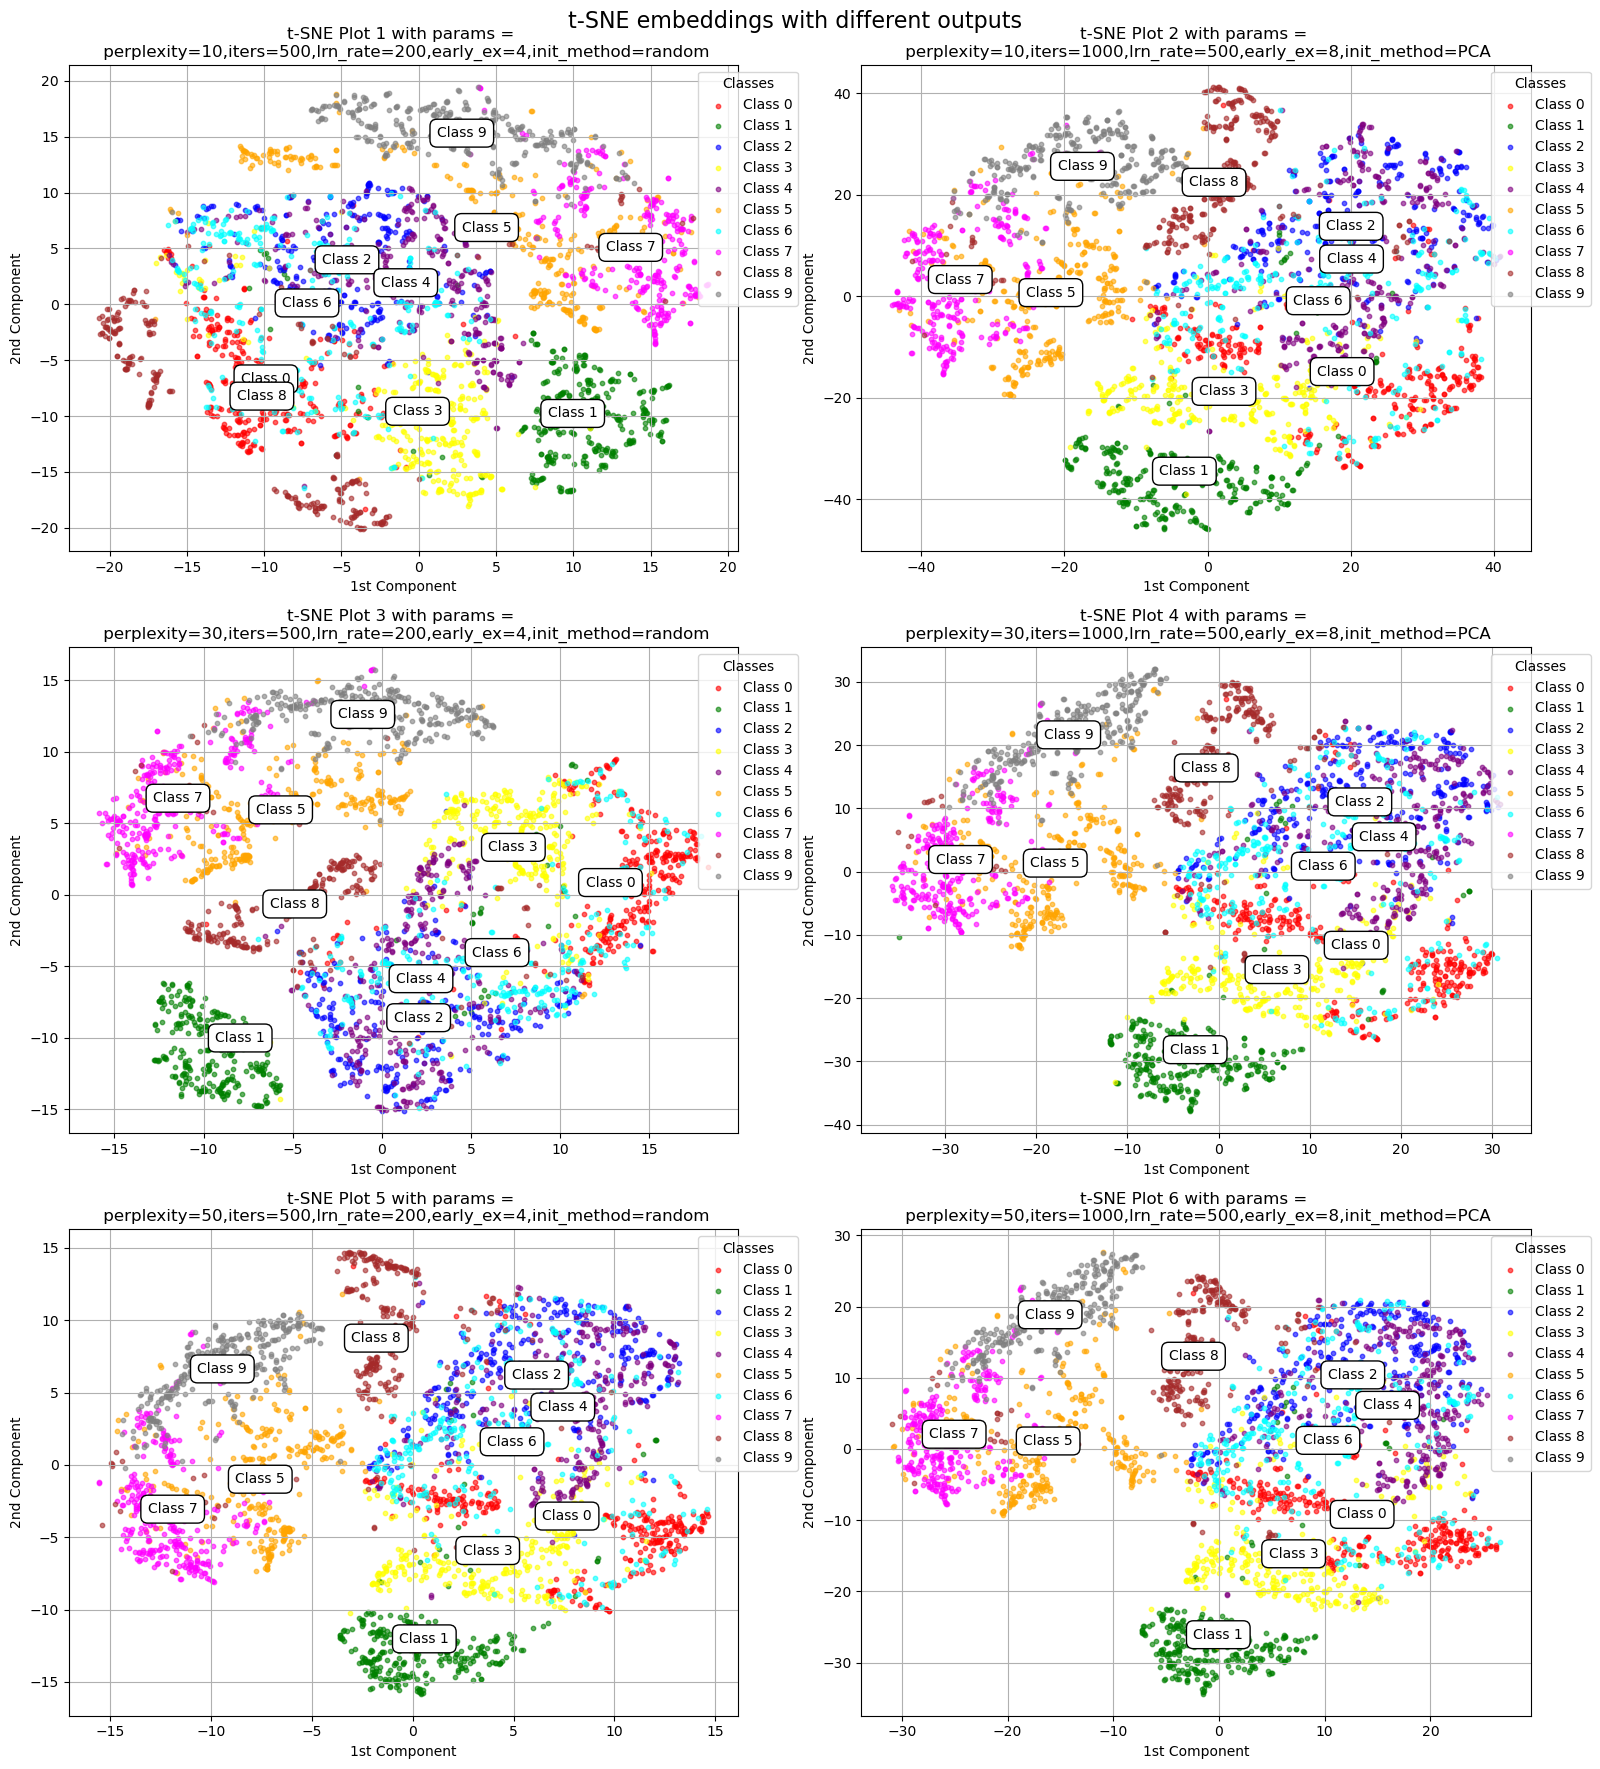

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 2, figsize=(16, 18), dpi=100)
fig.suptitle("t-SNE embeddings with different outputs", fontsize=16)

axes = axes.ravel()

for i, data in enumerate(results):
    ax = axes[i]
    
    embeddings = data['embeddings']
    labels = y_sample
    centroids = data['centroids']
    
    for j, class_label in enumerate(sorted(np.unique(labels))):
        class_points = embeddings[labels == class_label]
        ax.scatter(class_points[:, 0], class_points[:, 1], color=colors[j], label=f"Class {class_label}", s=10, alpha=0.6)
    
    for j, centroid in enumerate(centroids):
        ax.scatter(centroid[0], centroid[1], color=colors[j], marker='x', s=100)
        ax.text(centroid[0], centroid[1], f'Class {j}', fontsize=10, ha='center', va='center', 
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    ax.set_title(f"t-SNE Plot {i+1} with params = \n {data['params']}")
    ax.legend(loc='upper right', title="Classes", bbox_to_anchor=(1.1, 1))
    ax.set_xlabel("1st Component")
    ax.set_ylabel("2nd Component")
    ax.grid(True)

plt.tight_layout()
plt.show()

## Observations:

- The t-SNE algorithm is very sensitive to hyperparameters, and the choice of hyperparameters can significantly affect the quality of the embeddings.
- The initialization method also plays a crucial role in the convergence of the algorithm. As on the right side of the plot we get the blue cluster randomly at different location.
- The perplexity parameter controls the number of nearest neighbors that are considered in the high-dimensional space.
- The learning rate and momentum parameters control the step size and the momentum of the gradient descent algorithm.
- The number of iterations also affects the convergence of the algorithm.
- The objective function J is a measure of how well the embeddings preserve the pairwise distances between the data points.
- The distance D between the centroids is a measure of how well the embeddings separate the different classes in the data.
- By optimizing the hyperparameters, we can maximize the distance D between the centroids and minimize the objective function J to obtain high-quality embeddings.
- The t-SNE algorithm is a powerful tool for visualizing high-dimensional data in a low-dimensional space and can reveal interesting patterns and structures in the data.
- The choice of hyperparameters is critical for the success of the algorithm, and careful tuning of the hyperparameters can lead to better embeddings.
- The t-SNE algorithm is computationally expensive and may not be suitable for very large datasets.
- Overall, the t-SNE algorithm is a valuable tool for exploratory data analysis and visualization of high-dimensional data.



## Final TSNE Plot

- Based on the above parameters search, going to run the process on full data
- The best parameters are selected based on the D and J values.
- but other observations also put in considerations like iterations and 

Initializing with PCA...
Optimizing Low Dimensional Embedding....


  0%|▏                                                                                                                                                                                                                | 1/1000 [00:03<1:04:32,  3.88s/it]

	Iteration 1: Value of Cost Function is 3.035972211690507


 10%|████████████████████▉                                                                                                                                                                                            | 100/1000 [04:37<41:05,  2.74s/it]

	Iteration 100: Value of Cost Function is 2.491186525923768


 20%|█████████████████████████████████████████▊                                                                                                                                                                       | 200/1000 [09:12<37:03,  2.78s/it]

	Iteration 200: Value of Cost Function is 2.6469975781830177


 30%|██████████████████████████████████████████████████████████████▋                                                                                                                                                  | 300/1000 [13:47<32:10,  2.76s/it]

	Iteration 300: Value of Cost Function is 2.2451684442602144


 40%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 400/1000 [18:22<27:09,  2.72s/it]

	Iteration 400: Value of Cost Function is 2.1132752679230205


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 500/1000 [22:56<23:17,  2.79s/it]

	Iteration 500: Value of Cost Function is 2.0539298810591546


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 600/1000 [27:31<18:04,  2.71s/it]

	Iteration 600: Value of Cost Function is 2.0099913575553594


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 700/1000 [32:01<13:34,  2.72s/it]

	Iteration 700: Value of Cost Function is 1.9742444656654075


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 800/1000 [36:35<09:04,  2.72s/it]

	Iteration 800: Value of Cost Function is 1.9439041256221432


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 900/1000 [41:11<04:29,  2.70s/it]

	Iteration 900: Value of Cost Function is 1.9176162956263572


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [45:41<00:00,  2.74s/it]

	Iteration 1000: Value of Cost Function is 1.89446319360445
$perplexity=50,iters=1000,lrn_rate=200,early_ex=6,init_method=PCA, Completed Low Dimensional Embedding: Final Cost = 1.89446319360445


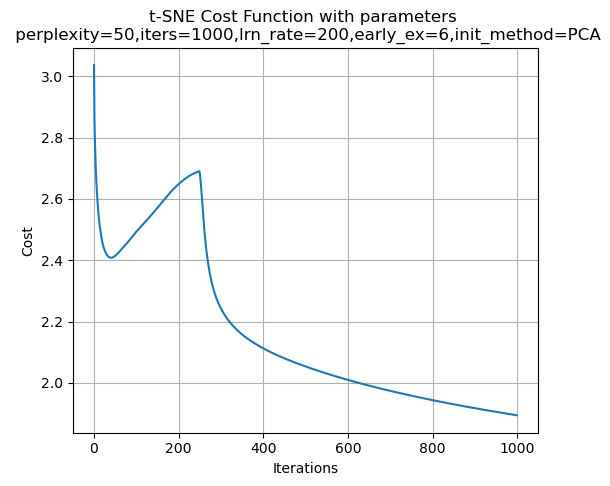

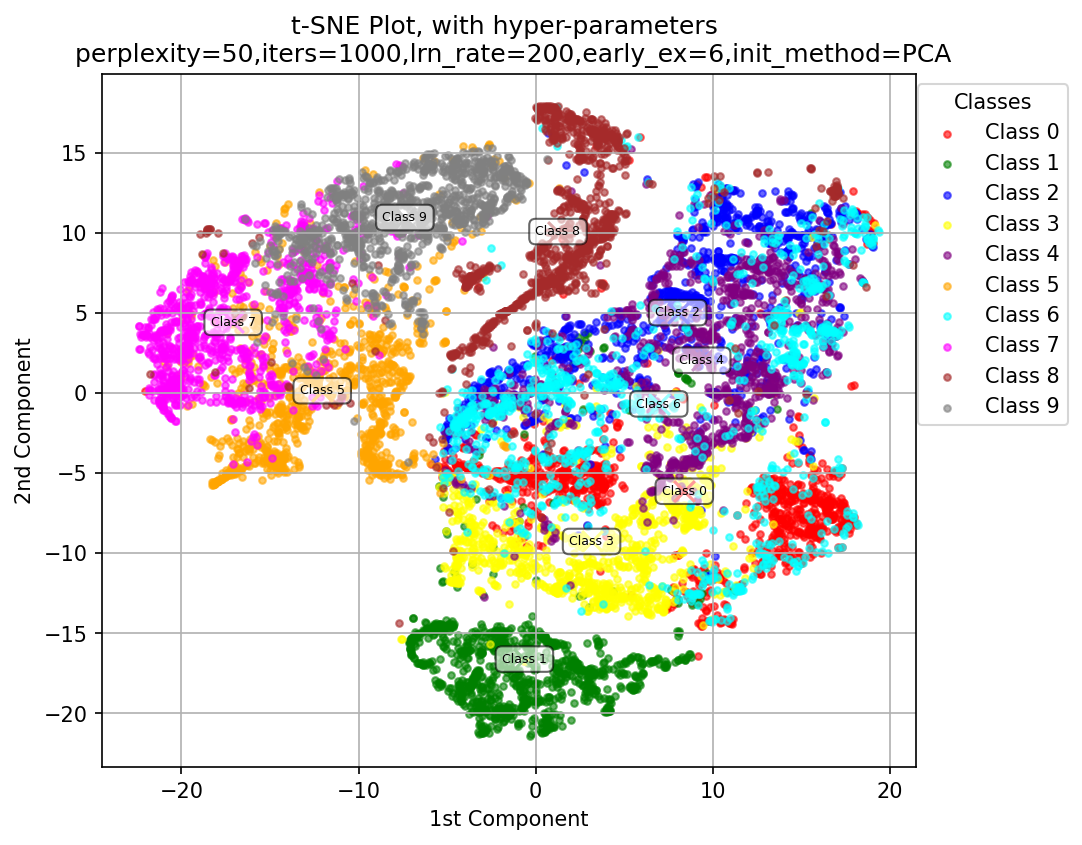

In [36]:
"""
Running on Full Data with Best Parameters
"""

tsne = MyTSNE(perplexity=50, iterations=1000, learning_rate=200, n_components=2, momentum=0.5, 
              early_exaggeration=6, initialization_method='PCA')
embeddings, Y = tsne.fit(X)

centroids = compute_centroids(embeddings, y)
tsne.plot_cost()
tsne.plot_embeddings(embeddings, y, centroids)

## Observations - 

- The class 0, 2, 4, 6 are very close to each other, and as we can see this in the raw data. Each of the class represents the similar type of clothes.
- Class 1, 5, 7, 9 represents very different articles and that is also captured in the plot, making each cluster distinctive.
- The class-6 is very prominent so have the maximum overlap with other points.
- the plot is very good in capturing different features.
- Even though its very expensive to run, but gives the best results. 
- There are some optimization that can be performed like more iterations and differnt momentum values.
- We can also see that the loss is increasing for iteratuons 50-250 but after that suddenly drop this is happening because of the early-exgeration, in this phase the cluster are getting together and and the global cluster speration is getting low priority.

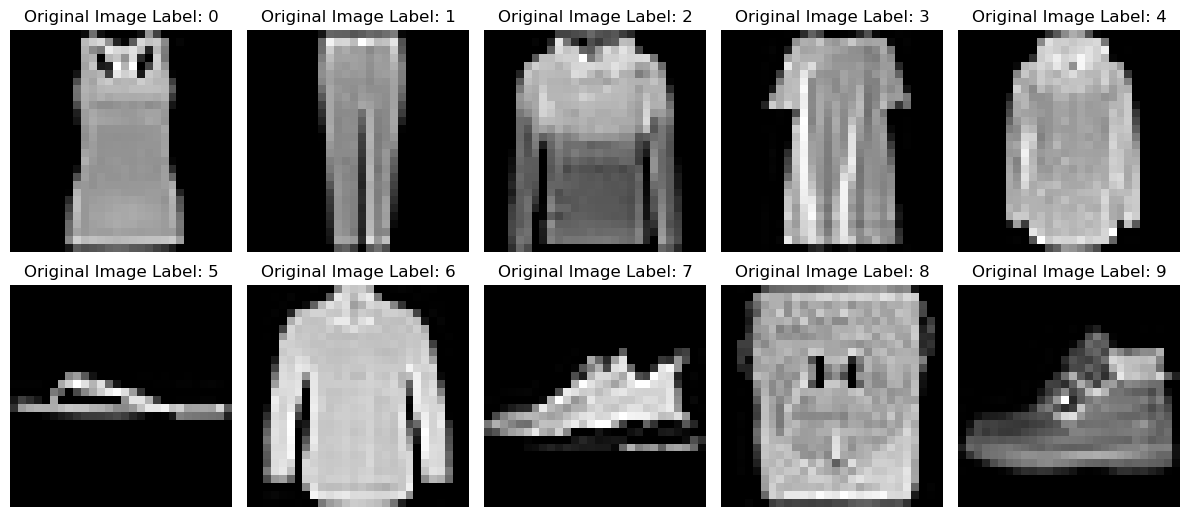

In [21]:
images, labels = X, y

unique_labels = np.unique(y)
X_sample_images, y_sample_images = [], []

for label in np.unique(y):
    idx = np.where(y == label)[0]
    X_sample_images.append(images[idx[0]])
    y_sample_images.append(label)

X_sample_images = np.array(X_sample_images)


fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 2.7 * 2))
axes = axes.ravel()
for i in range(10):
    ax = axes[i]
    ax.imshow(X_sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Original Image Label: {y_sample_images[i]}")
    ax.axis('off')
    
plt.tight_layout()
plt.show()


## Compare the results with PCA

- PCA is a linear dimensionality reduction technique that finds the principal components of the data.
- PCA is a deterministic algorithm that finds the orthogonal directions of maximum variance in the data.
- PCA is computationally efficient and can handle large datasets.
- PCA is a linear algorithm and may not be able to capture complex nonlinear relationships in the data.


- t-SNE is a nonlinear dimensionality reduction technique that preserves the local structure of the data.
- t-SNE is a stochastic algorithm that uses a probabilistic model to map the data to a low-dimensional space. 
- t-SNE is expensize and can take a lot of time, but its gives better results.

## Reference 
- https://towardsdatascience.com/svd-in-machine-learning-pca-f25cf9b837ae
- https://colah.github.io/posts/2014-10-Visualizing-MNIST/
- https://www.youtube.com/watch?v=osgqQy9Hr8s&ab_channel=UnfoldDataScience
- https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a
- https://www.dailydoseofds.com/formulating-and-implementing-the-t-sne-algorithm-from-scratch/
- https://towardsdatascience.com/t-sne-from-scratch-ft-numpy-172ee2a61df7
- https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html
- Best Video for TSNE explaination and different hyper-parameters https://www.youtube.com/watch?v=MnRskV3NY1k&t=1571s&ab_channel=T%C3%BCbingenMachineLearning 
